In [6]:
# Load data set and target values
import sys
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/Preprocess')
sys.path.append('/home/peng/git/Machine_learning_for_reliability_analysis/DAlgorithms')

import Preprocessdata
import RFclass

from __future__ import print_function
from __future__ import division

import logging
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score

from sklearn.ensemble import RandomForestClassifier as RFC


from bayes_opt import BayesianOptimization
from pandas.core.frame import DataFrame
import numpy as np
import pandas as pd


p= Preprocessdata.standardprocess()


save_path = '/home/peng/Documents/Project_C/Turbofan/Dataset/'
names = xrange(0,26)

df = pd.read_csv(save_path + 'train_FD002.txt', delim_whitespace=True, names=names, header=None)

print (df)

df_x = df
df -= df.min() 


        0    1        2       3      4       5       6        7        8   \
0        1    1  34.9983  0.8400  100.0  449.44  555.32  1358.61  1137.23   
1        1    2  41.9982  0.8408  100.0  445.00  549.90  1353.22  1125.78   
2        1    3  24.9988  0.6218   60.0  462.54  537.31  1256.76  1047.45   
3        1    4  42.0077  0.8416  100.0  445.00  549.51  1354.03  1126.38   
4        1    5  25.0005  0.6203   60.0  462.54  537.07  1257.71  1047.93   
5        1    6  25.0045  0.6205   60.0  462.54  537.02  1266.38  1048.72   
6        1    7  42.0043  0.8409  100.0  445.00  549.74  1347.45  1127.19   
7        1    8  20.0020  0.7002  100.0  491.19  607.44  1481.69  1252.36   
8        1    9  41.9995  0.8407  100.0  445.00  549.33  1348.23  1127.45   
9        1   10  42.0011  0.8400  100.0  445.00  549.33  1356.40  1127.11   
10       1   11  42.0029  0.8400  100.0  445.00  549.81  1352.72  1126.23   
11       1   12   0.0015  0.0010  100.0  518.67  642.70  1585.52  1402.63   

In [7]:
print (df[df[0]==260])

        0    1        2       3      4       5       6        7        8   \
53443  260    1  34.9989  0.8400  100.0  449.44  555.44  1371.34  1121.46   
53444  260    2  19.9985  0.7000  100.0  491.19  607.07  1475.26  1246.48   
53445  260    3  42.0072  0.8400  100.0  445.00  549.09  1351.31  1118.72   
53446  260    4  42.0076  0.8404  100.0  445.00  549.54  1345.74  1120.30   
53447  260    5  42.0016  0.8400  100.0  445.00  549.43  1352.04  1119.89   
53448  260    6  42.0039  0.8402  100.0  445.00  549.52  1342.51  1125.41   
53449  260    7  25.0076  0.6205   60.0  462.54  536.38  1261.46  1035.94   
53450  260    8  25.0015  0.6200   60.0  462.54  536.25  1254.04  1046.27   
53451  260    9  10.0048  0.2505  100.0  489.05  604.37  1500.46  1304.21   
53452  260   10  42.0063  0.8413  100.0  445.00  548.98  1349.58  1129.48   
53453  260   11  25.0047  0.6200   60.0  462.54  536.44  1261.18  1048.35   
53454  260   12  42.0026  0.8400  100.0  445.00  549.34  1351.98  1119.60   

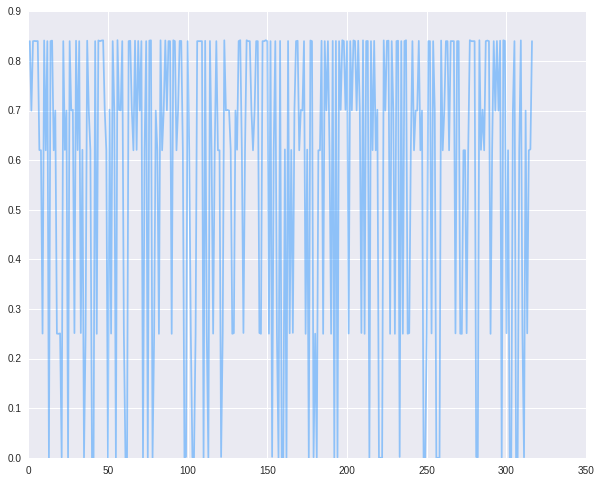

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sen
%matplotlib inline

plt.figure(figsize=(10, 8))

plt.plot(df[df[0]==260][1], df[df[0]==260][3], c= '#3399ff', alpha=0.5, 
            label = 'Healthy State')

plt.show()

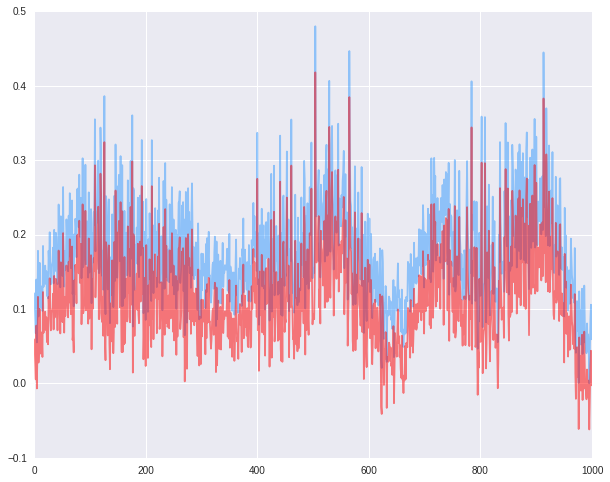

In [16]:
import numpy as np

n = 1000
limit_low = 0
limit_high = 0.48




my_data = np.random.normal(0, 0.5, n) \
          + np.abs(np.random.normal(0, 2, n) \
                   * np.sin(np.linspace(0, 3*np.pi, n)) ) \
          + np.sin(np.linspace(0, 5*np.pi, n))**2 \
          + np.sin(np.linspace(1, 6*np.pi, n))**2

scaling = (limit_high - limit_low) / (max(my_data) - min(my_data))

my_data_0 = my_data * scaling
my_data_1 = my_data * scaling
my_data_1= my_data_1 + (limit_low - min(my_data_1))


plt.figure(figsize=(10, 8))

plt.plot(xrange(0,len(my_data)), my_data_1, c= '#3399ff', alpha=0.5, 
            label = 'Healthy State')
plt.plot(xrange(0,len(my_data)), my_data_0, c= 'r', alpha=0.5, 
            label = 'Healthy State')
plt.show()


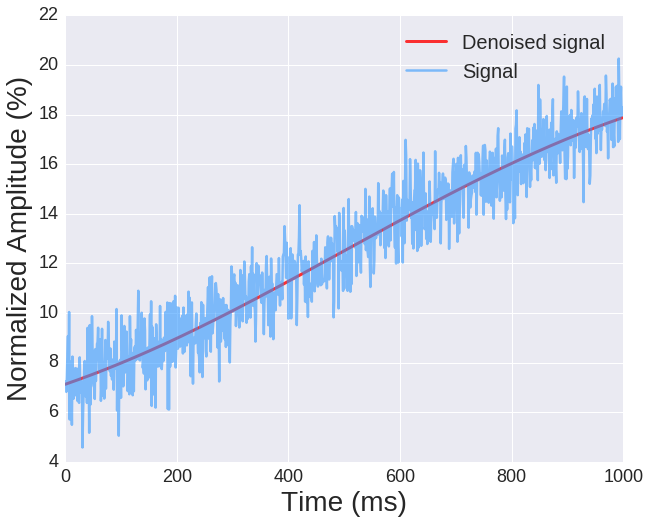

In [44]:

pure = np.linspace(-1, 1, 1000)



free = (pure *2 + 25)/2 + pure/6 + np.sin(pure)*5

noise = np.random.normal(0, 1, 1000)
signal = free + noise

plt.figure(figsize=(10, 8))

plt.plot(xrange(0,len(pure)), free, c= 'r', alpha=0.8, lw = 3,
            label = 'Denoised signal')

plt.plot(xrange(0,len(pure)), signal, c= '#3399ff', alpha=0.6, lw = 2.5, 
            label = 'Signal')

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time (ms)',fontsize = 28)
plt.ylabel('Normalized Amplitude (%)',fontsize = 28)

plt.legend(fontsize = 20)
plt.show()


In [2]:
'''This script demonstrates how to build a variational autoencoder with Keras.
Reference: "Auto-Encoding Variational Bayes" https://arxiv.org/abs/1312.6114
'''
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
import timeit


start = timeit.default_timer()

#batch_size = 100
original_dim = 24
latent_dim = 2
intermediate_dim = 12
nb_epoch = 50

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.)
    return z_mean + K.exp(z_log_var / 2) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)


def vae_loss(x, x_decoded_mean):
    xent_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

vae = Model(x, x_decoded_mean)
vae.compile(optimizer='rmsprop', loss=vae_loss)

vae.fit(train, train,
        shuffle=True,
        nb_epoch=nb_epoch,
        #batch_size=batch_size,
        verbose = 0)

# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(test
                                # , batch_size=batch_size
                                )

stop = timeit.default_timer()

print ("The running takes %r min" %((stop-start)/60))

Using Theano backend.
ERROR (theano.sandbox.cuda): ERROR: Not using GPU. Initialisation of device 0 failed:
initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1

ERROR (theano.sandbox.cuda): ERROR: Not using GPU. Initialisation of device gpu failed:
initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1



RuntimeError: ('initCnmem: cnmemInit call failed! Reason=CNMEM_STATUS_OUT_OF_MEMORY. numdev=1\n', 'You asked to force this device and it failed. No fallback to the cpu or other gpu device.')

In [10]:
color_list = []
for i in testlabel:
    if i == 0:
        color_list.append('b')
    elif i==1:
        color_list.append('r')
    else:
        color_list.append('y')

In [11]:
df_label = pd.DataFrame({'mean': x_test_encoded[:,0], 'std': x_test_encoded[:, 1], 'label': testlabel})

print (df_label)

      label      mean       std
0       1.0 -0.389308 -0.006561
1       2.0  0.565488  0.041595
2       1.0 -0.503428  0.011860
3       1.0 -0.537582  0.004363
4       2.0  0.510458 -0.000308
5       0.0 -0.588095  0.013944
6       0.0 -0.137444 -0.031051
7       0.0 -0.042009 -0.007015
8       0.0 -0.665984  0.020006
9       2.0 -0.002367  0.017673
10      1.0 -0.455827  0.015858
11      0.0 -0.664828  0.061853
12      0.0 -0.416992 -0.018377
13      1.0 -0.198944 -0.000777
14      1.0 -0.094992  0.003205
15      0.0 -0.323477 -0.011506
16      0.0 -0.562201  0.038913
17      1.0 -0.533662  0.024521
18      0.0 -0.039000 -0.005429
19      2.0  0.908188  0.034117
20      0.0 -0.490245 -0.018841
21      1.0 -0.265026 -0.007765
22      1.0 -0.442114  0.017656
23      1.0 -0.077760 -0.007025
24      2.0  0.979759  0.021371
25      1.0 -0.283761  0.002230
26      0.0 -0.540395  0.000916
27      1.0 -0.233495 -0.010427
28      0.0 -0.318935  0.015389
29      0.0 -0.637067  0.012184
...     

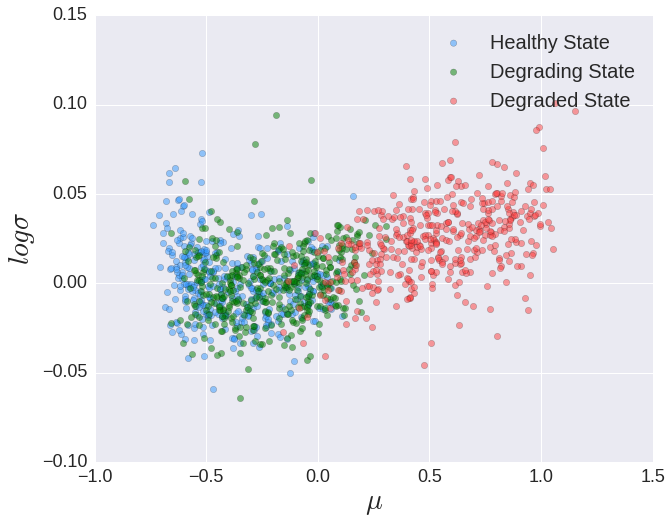

In [73]:
import seaborn as sns

plt.figure(figsize=(10, 8))

plt.scatter(df_label[df_label['label']==0]['mean'], df_label[df_label['label']==0]['std'], c= '#3399ff', alpha=0.5, 
            label = 'Healthy State',s = 40)
plt.scatter(df_label[df_label['label']==1]['mean'], df_label[df_label['label']==1]['std'], c= '#008000', alpha=0.5,
            label = 'Degrading State',s = 40)
plt.scatter(df_label[df_label['label']==2]['mean'], df_label[df_label['label']==2]['std'],c= '#ff4040', alpha=0.5,
           label = 'Degraded State',s = 40)

plt.xlabel('$\mu$',fontsize = 28)
plt.ylabel('$log\sigma$',fontsize = 28)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20)
plt.show()

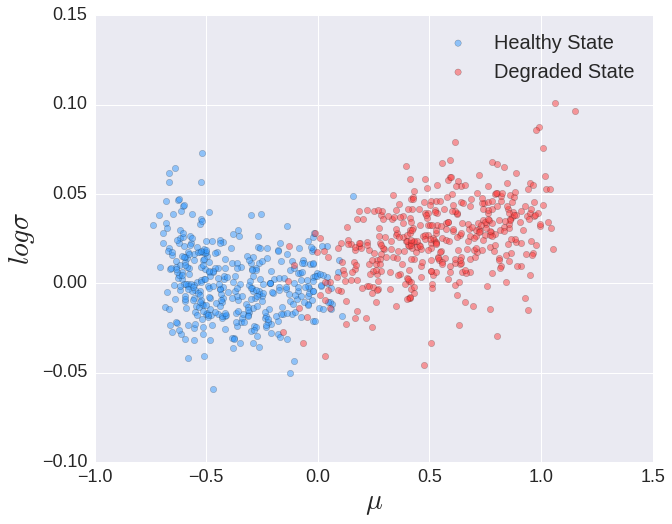

In [71]:
import seaborn as sns

plt.figure(figsize=(10, 8))

plt.scatter(df_label[df_label['label']==0]['mean'], df_label[df_label['label']==0]['std'], c= '#3399ff', alpha=0.5, 
            label = 'Healthy State',s = 40)
#plt.scatter(df_label[df_label['label']==1]['mean'], df_label[df_label['label']==1]['std'], c= 'y', alpha=0.5)

plt.scatter(df_label[df_label['label']==2]['mean'], df_label[df_label['label']==2]['std'],
            c= '#ff4040', alpha=0.5, label = 'Degraded State', s = 40)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('$\mu$',fontsize = 28)
plt.ylabel('$log\sigma$',fontsize = 28)

plt.legend(fontsize = 20)
plt.show()

In [70]:
df_label_11 = pd.DataFrame({'mean': x_test_encoded[:,0], 'std': x_test_encoded[:, 1], 'label': testlabel})

df_label_2 = df_label_11[df_label_11['label']!=1]

df_label_22 = df_label_2.drop(df_label_2.columns[[0]], axis=1)

print (df_label_22)


          mean       std
0    -0.112007 -0.012010
1     0.146401 -0.020649
2    -0.135412 -0.003333
4    -0.227375 -0.091763
5    -0.042228 -0.015999
6     0.172281 -0.029683
7     0.064537 -0.017487
9    -0.077083 -0.017318
10    0.008473 -0.015574
17   -0.134143 -0.008681
18    0.062552 -0.005957
19    0.056086 -0.010850
20   -0.012362 -0.021182
22    0.120055 -0.014980
23    0.067377 -0.015963
24    0.073445 -0.024005
25   -0.012757 -0.015384
26    0.083185 -0.020896
28   -0.073136 -0.012957
30    0.082683 -0.012682
31    0.098897 -0.028576
32   -0.076737 -0.016765
33   -0.036443 -0.016995
34    0.068912 -0.008517
35    0.083931 -0.015561
37   -0.133126 -0.012669
39   -0.023102 -0.016217
41    0.030415 -0.018826
43   -0.094938 -0.017801
45   -0.050926 -0.020378
...        ...       ...
2354  0.152405 -0.011270
2355  0.057717 -0.020159
2356 -0.037789 -0.020261
2358 -0.070147 -0.011311
2359  0.082966 -0.019594
2361 -0.024450 -0.020108
2362  0.029715 -0.013414
2364 -0.036475 -0.009978


In [79]:
output_label = np.array(df_label_2['label'])

output_label_1 = ((output_label /2)-1)*(-1)
print (output_label_1[0:10])

[ 1. -0.  1.  1.  1. -0. -0.  1. -0.  1.]


In [71]:
df_label_1 = pd.DataFrame({'mean': x_test_encoded[:,0], 'std': x_test_encoded[:, 1]})


train_kmm = np.array(df_label_22)

print (train_kmm)


[[-0.11200663 -0.01200982]
 [ 0.14640146 -0.02064875]
 [-0.1354124  -0.00333329]
 ..., 
 [-0.11136374 -0.01233955]
 [-0.07762598 -0.01615987]
 [ 0.10017151 -0.00997125]]


In [72]:
from sklearn.cluster import KMeans

n_num = 2

k_means = KMeans(init='k-means++', n_clusters=n_num, n_init=10)
X = train_kmm
k_means.fit(train_kmm)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)



In [80]:
print (np.shape(train_kmm))
print (k_means_labels[0:10])
print (df_label_2['label'][0:10])

from sklearn.metrics.classification import accuracy_score, confusion_matrix, classification_report

print (confusion_matrix(k_means_labels,output_label_1))
print( classification_report(k_means_labels, output_label_1))

(1545, 2)
[1 0 1 1 1 0 0 1 0 1]
0     0.0
1     2.0
2     0.0
4     0.0
5     0.0
6     2.0
7     2.0
9     0.0
10    2.0
17    0.0
Name: label, dtype: float64
[[703  28]
 [ 84 730]]
             precision    recall  f1-score   support

          0       0.89      0.96      0.93       731
          1       0.96      0.90      0.93       814

avg / total       0.93      0.93      0.93      1545



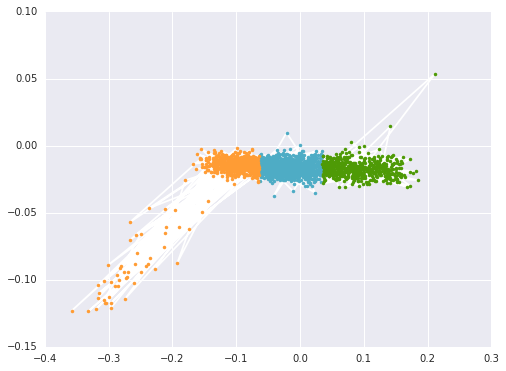

In [60]:
fig = plt.figure(figsize=(8, 6))
n_clusters = 3
colors = ['#4EACC5', '#FF9C34','#4E9A06']

# KMeans

for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)




plt.show()

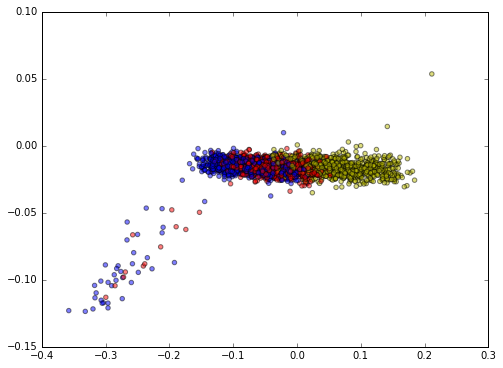

In [18]:



plt.figure(figsize=(8, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c= color_list, alpha=0.5)

plt.show()